In [1]:
import scipy.linalg as la
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import numpy as np
from helper_functions.grape_functions import *
from main_grape.Grape import Grape
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [2]:



#Defining time scales
total_time = 2.0
steps = 100

state_transfer = False
#Defining H0
qubit_state_num = 2
qubit_num = 8
alpha = 0.224574
freq_ge = 3.9225#GHz
ens = np.array([ 2*np.pi*ii*(freq_ge - 0.5*(ii-1)*alpha) for ii in np.arange(qubit_state_num)])
Q_x   = np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)+np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,qubit_state_num)),1)-np.diag(np.sqrt(np.arange(1,qubit_state_num)),-1))
Q_z   = np.diag(np.arange(0,qubit_state_num))
I_q = np.identity(qubit_state_num)
H_q = np.diag(ens)
H0 = kron_all(H_q,qubit_num, I_q) 
X = multi_kron(Q_x,qubit_num)
Z = multi_kron(Q_z,qubit_num)
Y = multi_kron(Q_y,qubit_num)
XI = kron_all(Q_x,qubit_num,I_q)

       


#Defining Concerned states (starting states)

psi0=[0]

all_ones_index = 0
for ii in range (qubit_num):
    all_ones_index = all_ones_index + qubit_state_num**ii
#Defining states to include in the drawing of occupation
states_draw_list = [0,all_ones_index]
states_draw_names = ['00..0','11..1']

#Defining U (Target)

U = np.zeros(qubit_state_num**qubit_num,dtype=complex)
U[0]=(1)/np.sqrt(2)

U[all_ones_index]=1/np.sqrt(2)
    


#Defining U0 (Initial)
q_identity = np.identity(qubit_state_num**qubit_num)
U0= q_identity

#Defining control Hs

Hops = [X,Y]
ops_max_amp = [2.0,2.0]
Hnames =['x','y']

#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-6,'learning_rate_decay':decay}
penalty_coeffs = {'envelope' : 0, 'dc':0, 'dwdt':0.0001,'d2wdt2':0.0001*0.001, 'forbidden':0}


In [3]:
print len(H0)
print all_ones_index

256
255


L-BFGS-B optimization done


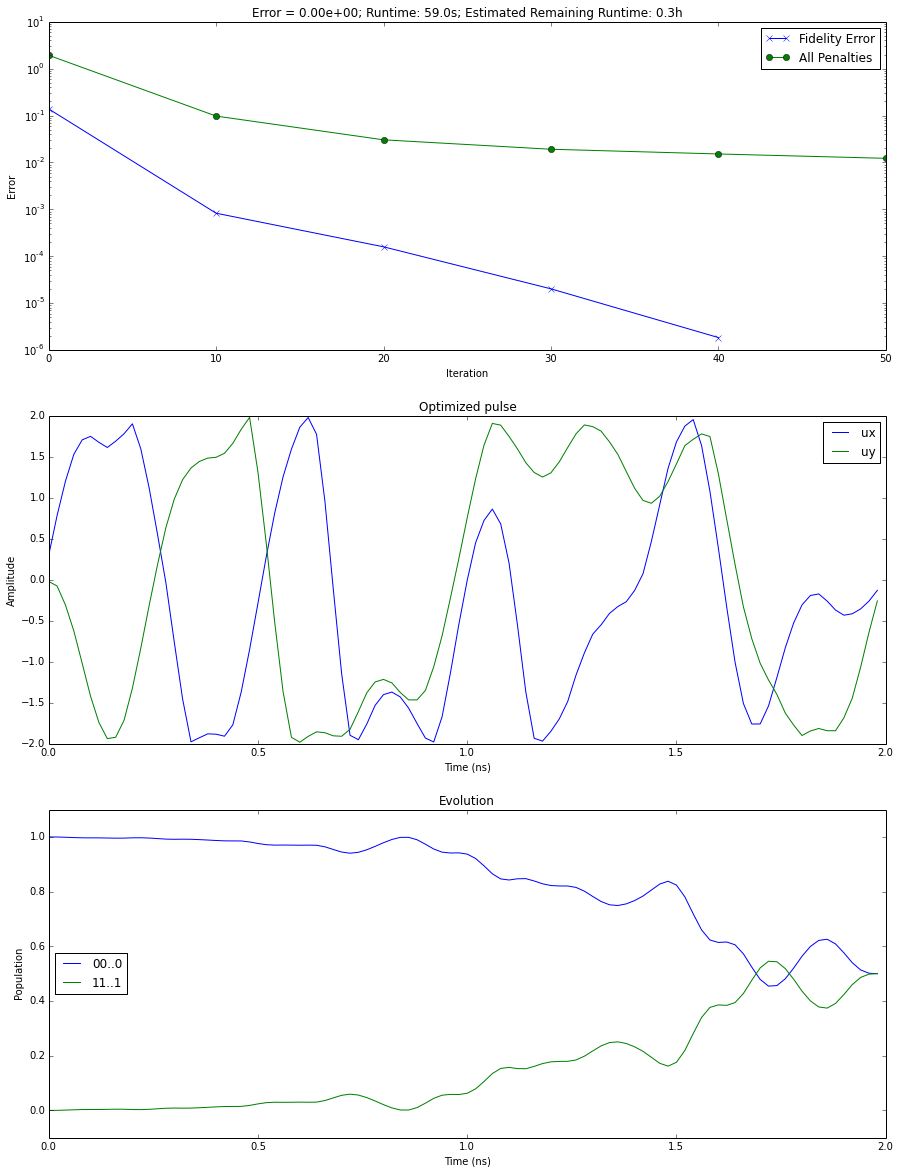

In [4]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True

uks,U_final = Grape(H0,Hops,Hnames,U,total_time,steps,psi0,convergence=convergence, draw = [states_draw_list,states_draw_names],  state_transfer=True,
                    show_plots = True, 
       unitary_error = 1e-6, method = 'L-BFGS-B',switch = False,  maxA=ops_max_amp,\
                   penalty_coeffs=penalty_coeffs)
      
      